In [193]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bs4 import BeautifulSoup
import os
import requests
from skimage import io
import skimage
from skimage import data
from skimage.color import rgb2hsv
import pandas as pd
import glob
from IPython.display import Image, display
from PIL import Image
from skimage import color
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage
import skimage
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.misc
from skimage import data, io
from skimage.morphology import disk
from skimage.color import rgb2gray

# Data

# scraping the data

In [157]:
from bs4 import BeautifulSoup
import requests

In [158]:
DATA_DIR = 'data-vang/'
ARTIST_URL = 'https://www.wikiart.org/en/{artist}/all-works/text-list'
PAINTING_URL = 'https://www.wikiart.org{painting_path}'

In [159]:
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [ ]:
artist_name = 'vincent-van-gogh'
url_query = ARTIST_URL.format(artist=artist_name)
artist_page = requests.get(url_query)
try:
    artist_page.raise_for_status()
except requests.exceptions.HTTPError as e:
    print("Error trying to retrieve {}".format(artist_page.url))
    raise e
soup = BeautifulSoup(artist_page.text, 'lxml')
IMAGE_DIR = os.path.join(DATA_DIR, artist_name)
if not os.path.exists(IMAGE_DIR):
    os.makedirs(IMAGE_DIR)


painting_paths = []

# retreive all rows in painting-list
for li in soup.find_all('li', {'class': 'painting-list-text-row'}):

    # retrieve all links in the current row
    for link in li.find_all('a'):
        href = link.get('href')
        # store in dictionary
        painting_paths.append(href)

print(len(painting_paths))
# painting_paths

def download_and_save(painting_url):
    r_painting_page = requests.get(painting_url)
    soup = BeautifulSoup(r_painting_page.text, 'lxml')
    for s in soup.find_all('span', {'itemprop': 'dateCreated'}):
        txt=s.text
    for img in soup.find_all('img', {'class': 'ms-zoom-cursor'}):
        print(img)
        img_url = img['src']
        img_url = img_url.split('!')[0]
        filename = img_url.split('/')[-1]

        outfile = os.path.join(IMAGE_DIR, filename)                       
        if not os.path.exists(outfile):                        
            print("downloading {}: {}".format(filename, img_url))
            r = requests.get(img_url, outfile)
            with open(outfile, 'wb') as f:
                f.write(r.content)
        else:
            #print("skipping {}".format(filename))
            pass
    return txt, filename
all_dates=[]
all_names=[]
listofdate = {}
for path in painting_paths:
    painting_path = PAINTING_URL.format(painting_path=path)
    txt,fname=download_and_save(painting_path)
    all_dates.append(txt)
    all_names.append(fname)
    

In [ ]:
DATA_DIR_1 = 'data-vang/vincent-van-gogh'

In [ ]:
all_wor_year = dict(zip(all_names, all_dates))

In [ ]:
work_and_year = pd.DataFrame.from_dict(all_wor_year,orient='index')
work_and_year

In [ ]:
work_and_year['artwork'] = work_and_year.index

In [ ]:
work_and_year.to_csv (r'works_and_year.csv', index = False, header=True)

In [161]:
workandyear = pd.read_csv("works_and_year.csv")

In [162]:
workandyear

,0,artwork
0,1862,the-goat-herd-1862.jpg
1,1862,dog(1).jpg
2,1862,milk-jug.jpg
3,1862,the-bridge.jpg
4,1863,corinthian-capital-1863(1).jpg
...,...,...
1926,1890,chair-near-the-stove(1).jpg
1927,1890,a-group-of-figures-on-the-beach(1).jpg
1928,1890,carriage(1).jpg
1929,1890,couple-walking(1).jpg


# calculating the saturation and other information we need

In [163]:
def calc_stats(file_name):
    filename_1 = os.path.join(DATA_DIR_1, file_name)
    filename = io.imread(filename_1)
    image_width = filename.shape[1]
    image_height = filename.shape[0]
    #change rgb to hsv to get hue, saturation, and value
    rgb_img = filename
    hsv_img = rgb2hsv(rgb_img)
    #get hue, saturation and value image
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    #get mean of those 3
    mean_hue = np.mean(hue_img, axis=(0,1))
    mean_saturation = np.mean(saturation_img, axis=(0,1))
    mean_brightness = np.mean(value_img)
    return_list = [image_width,image_height,mean_hue,mean_saturation,mean_brightness]
    return return_list

In [ ]:
import os
#making a new dataframe
df = pd.DataFrame()
#run through the notebook and get the data into dataframe
directory = 'data-vang/vincent-van-gogh'
list_of_name = []
for filename in os.listdir(directory):
    print(filename)
    if 'ipynb_checkpoints' in filename:
        continue
    if '.png' in filename:
        filename_1 = os.path.join(DATA_DIR_1, filename)
        im = Image.open(filename_1)
        rgb_im = im.convert('RGB')
        rgb_im.save(filename+'.jpg')
    else:
        list_of_name.append(filename.replace('.jpg',''))
        input_data = pd.Series(calc_stats(filename))
        df = df.append(input_data, ignore_index=True)
print("finish")




In [ ]:
df.to_csv (r'van_gogh.csv', index = False, header=True)

In [164]:
dataset = pd.read_csv("van_gogh.csv")

In [ ]:
dataset.rename(columns = {'0':'image_width'}, inplace = True) 
dataset.rename(columns = {'1':'image_height'}, inplace = True) 
dataset.rename(columns = {'2':'mean_hue'}, inplace = True) 
dataset.rename(columns = {'3':'mean_saturation'}, inplace = True) 
dataset.rename(columns = {'4':'mean_brightness'}, inplace = True) 


In [ ]:
dataset.to_csv (r'van_gogh_final_version.csv', index = False, header=True)

In [168]:
vang = pd.read_csv("van_gogh_final_version.csv")
vang.head()

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1)
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1


In [170]:
workandyear = pd.read_csv("works_and_year.csv")
workandyear = workandyear.rename({'artwork':'name'},axis = 1)
workandyear = workandyear.rename({'0':'year'},axis = 1)
workandyear['name'] = workandyear['name'].str.replace('.jpg','')
workandyear



,year,name
0,1862,the-goat-herd-1862
1,1862,dog(1)
2,1862,milk-jug
3,1862,the-bridge
4,1863,corinthian-capital-1863(1)
...,...,...
1926,1890,chair-near-the-stove(1)
1927,1890,a-group-of-figures-on-the-beach(1)
1928,1890,carriage(1)
1929,1890,couple-walking(1)


In [171]:
#new data frame with time in it
# we drop three artworks here because those artworks are in wrong file type that we cannot
#calculate their hue saturation and other variables we need
total = pd.merge(vang, workandyear, on='name',how='right')
#no data for the last 3, so drop 
total_new = total.iloc[:1928]
total_new.to_csv(r'use_dataf.csv', index = False)
total_new

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876,1876
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885,1885
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1),1890
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1,1886
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1,1885
...,...,...,...,...,...,...,...
1923,791.0,396.0,0.142173,0.286870,0.631318,wood-gatherers-in-the-snow-1884,1884
1924,533.0,1024.0,0.115595,0.205702,0.829762,orphan-man-standing-1882,1882
1925,1024.0,694.0,0.428363,0.199726,0.564009,the-heath-with-a-wheelbarrow-1883,1883
1926,1687.0,2202.0,0.248920,0.609204,0.610581,van-gogh-s-chair-1889,1889


# face detection

In [3]:
DATA_DIR = 'data-vang/'
ARTIST_URL = 'https://www.wikiart.org/en/{artist}/all-works/text-list'
PAINTING_URL = 'https://www.wikiart.org{painting_path}'

In [4]:
DATA_DIR_1 = 'data-vang/vincent-van-gogh'




In [55]:
workandyear = pd.read_csv("works_and_year.csv")

In [11]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import numpy as np

In [12]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

In [13]:
#use hog and face detection to detect whether there is a people in artworks, also use the word detect to show whether
#there will have people in the artworks, --> people means work of people 

In [14]:
#hog object detection part --> detect whether people appar in the arworks

In [15]:
#!pip install imutils --user

In [16]:
hog = cv2.HOGDescriptor()                              
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:
import cv2 
dictionary_hog = {}
directory = "data-vang/vincent-van-gogh"
list_of_word = []
for filename in os.listdir(directory):
    if "ipynb_checkpoints" in filename:
        continue
    print(filename)
    new_link = directory+'/'+filename
    image = cv2.imread(new_link)
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    for (xA, yA, xB, yB) in pick:
        dictionary_hog[filename] = 'yes'
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
    

In [ ]:
#generating results for the hog detection and save as csv file

In [27]:
dataf_hog = pd.DataFrame.from_dict(dictionary_hog, orient='index')

In [34]:
dataf_hog = dataf_hog.assign(work = dataf_hog.index)
dataf_hog

,0,work
baby-in-a-carriage(1).jpg,yes,baby-in-a-carriage(1).jpg
landscape-with-willows-and-sun-shining-through-the-clouds-1884.jpg,yes,landscape-with-willows-and-sun-shining-through...
woman-sewing-1881.jpg,yes,woman-sewing-1881.jpg
three-studies-1890.jpg,yes,three-studies-1890.jpg
seated-man-with-a-beard-1886-1.jpg,yes,seated-man-with-a-beard-1886-1.jpg
...,...,...
carpenter-1882(1).jpg,yes,carpenter-1882(1).jpg
mademoiselle-gachet-at-the-piano-1890.jpg,yes,mademoiselle-gachet-at-the-piano-1890.jpg
farmhouses-among-trees-1883(1).jpg,yes,farmhouses-among-trees-1883(1).jpg
orphan-man-standing-1882.jpg,yes,orphan-man-standing-1882.jpg


In [35]:
dataf_hog.to_csv(r'datafhog.csv', index = False)

In [2]:
datafhof = pd.read_csv("datafhog.csv")
datafhof

,0,work
0,yes,baby-in-a-carriage(1).jpg
1,yes,landscape-with-willows-and-sun-shining-through...
2,yes,woman-sewing-1881.jpg
3,yes,three-studies-1890.jpg
4,yes,seated-man-with-a-beard-1886-1.jpg
...,...,...
400,yes,carpenter-1882(1).jpg
401,yes,mademoiselle-gachet-at-the-piano-1890.jpg
402,yes,farmhouses-among-trees-1883(1).jpg
403,yes,orphan-man-standing-1882.jpg


In [ ]:
#hog part saving the csv file success

In [ ]:
#face detecton, some part the hog people detection cannot detection, for increasing the accuracy, we need to use 
#the face detection to detect people

In [37]:
import cv2 
dictionary_cascade = {}
directory = "data-vang/vincent-van-gogh"
list_of_word = []
for filename in os.listdir(directory):
    if "ipynb_checkpoints" in filename:
        continue
    new_link = directory+'/'+filename
    portrait = io.imread(new_link)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    portrait_cv = cv2.cvtColor(portrait, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        portrait_cv = cv2.rectangle(portrait_cv,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = portrait_cv[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            dictionary_cascade[filename] = 'yes'
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


In [41]:
dataf_cascade = pd.DataFrame.from_dict(dictionary_cascade, orient='index')

In [44]:
dataf_cascade = dataf_cascade.assign(work = dataf_cascade.index)
dataf_cascade

,0,work
woman-sewing-1881.jpg,yes,woman-sewing-1881.jpg
torso-of-venus-1887.jpg,yes,torso-of-venus-1887.jpg
madame-augustine-roulin-1889.jpg,yes,madame-augustine-roulin-1889.jpg
a-mousme-1888(1).jpg,yes,a-mousme-1888(1).jpg
man-sitting-with-a-glass-in-his-hand-1882.jpg,yes,man-sitting-with-a-glass-in-his-hand-1882.jpg
...,...,...
head-of-a-peasant-woman-with-white-cap-1885-6.jpg,yes,head-of-a-peasant-woman-with-white-cap-1885-6.jpg
clarinetist-and-piccolo-player-1887(1).jpg,yes,clarinetist-and-piccolo-player-1887(1).jpg
peasant-woman-head-1885-5.jpg,yes,peasant-woman-head-1885-5.jpg
still-life-with-grapes-1887.jpg,yes,still-life-with-grapes-1887.jpg


In [45]:
dataf_cascade.to_csv(r'datafcascade.csv', index = False)

In [3]:
datafcascade = pd.read_csv("datafcascade.csv")
datafcascade

,0,work
0,yes,woman-sewing-1881.jpg
1,yes,torso-of-venus-1887.jpg
2,yes,madame-augustine-roulin-1889.jpg
3,yes,a-mousme-1888(1).jpg
4,yes,man-sitting-with-a-glass-in-his-hand-1882.jpg
...,...,...
73,yes,head-of-a-peasant-woman-with-white-cap-1885-6.jpg
74,yes,clarinetist-and-piccolo-player-1887(1).jpg
75,yes,peasant-woman-head-1885-5.jpg
76,yes,still-life-with-grapes-1887.jpg


In [172]:
#cascade part saving dataframe success

In [173]:
#beside these 2 method, we also need to use whether the word (which can represent people ) show in the name of the 
#artworks to show whether there will be people in his artwork or not --> inproving the accuracy. 

In [47]:
import cv2 
dictionary_detection = {}
directory = "data-vang/vincent-van-gogh"
list_of_word = []
for filename in os.listdir(directory):
    if "ipynb_checkpoints" in filename:
        continue
    if "woman" in filename:
        dictionary_detection[filename] = 'yes'
    elif "women" in filename:
        dictionary_detection[filename] = 'yes'
    elif "man" in filename:
        dictionary_detection[filename] = 'yes'
    elif "men" in filename:
        dictionary_detection[filename] = 'yes'
    elif "people" in filename:
        dictionary_detection[filename] = 'yes'
    elif "worker" in filename:
        dictionary_detection[filename] = 'yes'

In [55]:
dataf_detect = pd.DataFrame.from_dict(dictionary_detection, orient='index')

In [56]:
dataf_detect = dataf_detect.assign(work =dataf_detect.index )


In [52]:
dataf_detect.to_csv(r'datafdetect.csv', index = False)

In [4]:
datafdetection = pd.read_csv("datafdetect.csv")

In [5]:
datafdetection

,0,work
0,yes,peasant-woman-gleaning-1885-1.jpg
1,yes,scheveningen-woman-sewing-2-1881.jpg
2,yes,the-roubine-du-roi-canal-with-washerwomen-1888...
3,yes,woman-sewing-1881.jpg
4,yes,man-stooping-with-stick-or-spade-1882.jpg
...,...,...
509,yes,woman-with-wheelbarrow-at-night-1884.jpg
510,yes,peasant-woman-gleaning-1885.jpg
511,yes,woman-sewing-with-a-girl-1883.jpg
512,yes,a-woman-s-legs(1).jpg


In [ ]:
#combine those three results together and get whether the artworks has object or not


In [6]:
datafhof = datafhof.rename({'0':"hog_detection"}, axis = 1)
datafhof

,hog_detection,work
0,yes,baby-in-a-carriage(1).jpg
1,yes,landscape-with-willows-and-sun-shining-through...
2,yes,woman-sewing-1881.jpg
3,yes,three-studies-1890.jpg
4,yes,seated-man-with-a-beard-1886-1.jpg
...,...,...
400,yes,carpenter-1882(1).jpg
401,yes,mademoiselle-gachet-at-the-piano-1890.jpg
402,yes,farmhouses-among-trees-1883(1).jpg
403,yes,orphan-man-standing-1882.jpg


In [7]:
datafcascade = datafcascade.rename({'0':"face_detection"}, axis = 1)
datafcascade

,face_detection,work
0,yes,woman-sewing-1881.jpg
1,yes,torso-of-venus-1887.jpg
2,yes,madame-augustine-roulin-1889.jpg
3,yes,a-mousme-1888(1).jpg
4,yes,man-sitting-with-a-glass-in-his-hand-1882.jpg
...,...,...
73,yes,head-of-a-peasant-woman-with-white-cap-1885-6.jpg
74,yes,clarinetist-and-piccolo-player-1887(1).jpg
75,yes,peasant-woman-head-1885-5.jpg
76,yes,still-life-with-grapes-1887.jpg


In [8]:
datafdetection = datafdetection.rename({'0':"word_detect"}, axis = 1)
datafdetection

,word_detect,work
0,yes,peasant-woman-gleaning-1885-1.jpg
1,yes,scheveningen-woman-sewing-2-1881.jpg
2,yes,the-roubine-du-roi-canal-with-washerwomen-1888...
3,yes,woman-sewing-1881.jpg
4,yes,man-stooping-with-stick-or-spade-1882.jpg
...,...,...
509,yes,woman-with-wheelbarrow-at-night-1884.jpg
510,yes,peasant-woman-gleaning-1885.jpg
511,yes,woman-sewing-with-a-girl-1883.jpg
512,yes,a-woman-s-legs(1).jpg


In [9]:
#merge one datafhof & datafcascade
result1 = pd.merge(datafhof, datafcascade, on = "work", how = "outer")
result1

,hog_detection,work,face_detection
0,yes,baby-in-a-carriage(1).jpg,NaN
1,yes,landscape-with-willows-and-sun-shining-through...,NaN
2,yes,woman-sewing-1881.jpg,yes
3,yes,three-studies-1890.jpg,NaN
4,yes,seated-man-with-a-beard-1886-1.jpg,NaN
...,...,...,...
467,NaN,peasant-woman-seated-1885.jpg,yes
468,NaN,portrait-of-a-woman-head-of-a-peasant-woman-wi...,yes
469,NaN,head-of-a-peasant-woman-with-white-cap-1885-6.jpg,yes
470,NaN,clarinetist-and-piccolo-player-1887(1).jpg,yes


In [10]:
result = pd.merge(result1, datafdetection, on = "work", how = "outer")
result

,hog_detection,work,face_detection,word_detect
0,yes,baby-in-a-carriage(1).jpg,NaN,NaN
1,yes,landscape-with-willows-and-sun-shining-through...,NaN,NaN
2,yes,woman-sewing-1881.jpg,yes,yes
3,yes,three-studies-1890.jpg,NaN,NaN
4,yes,seated-man-with-a-beard-1886-1.jpg,NaN,yes
...,...,...,...,...
810,NaN,orphan-man-with-top-hat-holding-cup-1882.jpg,NaN,yes
811,NaN,woman-with-wheelbarrow-at-night-1884.jpg,NaN,yes
812,NaN,peasant-woman-gleaning-1885.jpg,NaN,yes
813,NaN,woman-sewing-with-a-girl-1883.jpg,NaN,yes


In [11]:
result = result.assign(person = 1)
result

,hog_detection,work,face_detection,word_detect,person
0,yes,baby-in-a-carriage(1).jpg,NaN,NaN,1
1,yes,landscape-with-willows-and-sun-shining-through...,NaN,NaN,1
2,yes,woman-sewing-1881.jpg,yes,yes,1
3,yes,three-studies-1890.jpg,NaN,NaN,1
4,yes,seated-man-with-a-beard-1886-1.jpg,NaN,yes,1
...,...,...,...,...,...
810,NaN,orphan-man-with-top-hat-holding-cup-1882.jpg,NaN,yes,1
811,NaN,woman-with-wheelbarrow-at-night-1884.jpg,NaN,yes,1
812,NaN,peasant-woman-gleaning-1885.jpg,NaN,yes,1
813,NaN,woman-sewing-with-a-girl-1883.jpg,NaN,yes,1


In [12]:
#should be merge into large dataset version
result_merge = result[['work', 'person']]
result_merge['work'] = result_merge['work'].str.replace(".jpg", '')
result_merge['work'] = result_merge['work'].str.replace(".Jpg", '')
result_merge= result_merge.rename({"work":'name'}, axis = 1)
result_merge

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,person
0,baby-in-a-carriage(1),1
1,landscape-with-willows-and-sun-shining-through...,1
2,woman-sewing-1881,1
3,three-studies-1890,1
4,seated-man-with-a-beard-1886-1,1
...,...,...
810,orphan-man-with-top-hat-holding-cup-1882,1
811,woman-with-wheelbarrow-at-night-1884,1
812,peasant-woman-gleaning-1885,1
813,woman-sewing-with-a-girl-1883,1


# Getting result of object detection

In [ ]:
#start generate result of person detection part
final_result = pd.merge(total_new, result_merge, on = "name", how = "left")
final_result = final_result.fillna(0)
final_result['name'] =  final_result['name'].str.replace(".Jpg", '')
final_result['name'] =  final_result['name'].str.replace(".JPG", '')
final_result

In [29]:
final_result.to_csv(r'face_detection_result.csv', index = False)

In [174]:
final_result = pd.read_csv("face_detection_result.csv")

In [175]:
final_result_test = final_result.sort_values(by = ['year'])
final_result_test

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person
1086,2633.0,795.0,0.266470,0.111068,0.638148,the-bridge,1862,0.0
940,1292.0,1602.0,0.155607,0.085451,0.801531,milk-jug,1862,0.0
80,1024.0,775.0,0.796594,0.037634,0.810272,the-goat-herd-1862,1862,1.0
239,1890.0,1214.0,0.139788,0.069713,0.901548,dog(1),1862,1.0
999,719.0,1024.0,0.273486,0.060764,0.903436,corinthian-capital-1863(1),1863,0.0
...,...,...,...,...,...,...,...,...
1148,832.0,1047.0,0.309812,0.635594,0.544084,the-church-at-auvers-1890,1890,1.0
1144,1781.0,1496.0,0.105890,0.651268,0.611234,wheat-fields-with-auvers-in-the-background-1890,1890,0.0
599,2514.0,1212.0,0.277718,0.424338,0.576843,undergrowth-with-two-figures-1890,1890,0.0
612,846.0,1201.0,0.265741,0.496377,0.629455,still-life-glass-with-carnations-1890,1890,0.0


In [176]:
#function to calculate the image energy
def calcDGenergy(img):
    # from from https://stackoverflow.com/a/48974892

    #convert from uint8 to int64 to prevent overflow problems
    arr = np.array(img, dtype = int)

    #calculate squared difference ((x-1, y) - (x+1, y))^2 for each R, G and B pixel
    deltaX2 = np.square(np.roll(arr, -1, axis = 0) - np.roll(arr, 1, axis = 0))

    #same for y axis
    deltaY2 = np.square(np.roll(arr, -1, axis = 1) - np.roll(arr, 1, axis = 1))

    #add R, G and B values for each pixel, then add x- and y-shifted values
    dualEnergy = np.sum(deltaX2, axis = 2) + np.sum(deltaY2, axis = 2)
    return dualEnergy

In [106]:
#calculate the edges and energy part
dictionary_edges = {}
dictionary_energy = {}
directory = "data-vang/vincent-van-gogh"
list_of_word = []
for filename in os.listdir(directory):
    if '.ipynb_checkpoints' in filename:
        continue
    data_path = os.path.join(directory,filename)
    image = io.imread(data_path)
    rgb_img = image
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    sobel_x = ndimage.sobel(value_img, axis=0, mode='constant')
    sobel_y = ndimage.sobel(value_img, axis=1, mode='constant')
    edge_image = np.hypot(sobel_x, sobel_y)
    dgEnergy = calcDGenergy(image)
    dictionary_edges[filename] = np.sum(edge_image)/ edge_image.size
    dictionary_energy[filename] = dgEnergy.mean()

In [107]:
dataf_edge = pd.DataFrame.from_dict(dictionary_edges, orient='index')
dataf_energy = pd.DataFrame.from_dict(dictionary_energy, orient='index')

In [108]:
dataf_edge = dataf_edge.assign(name = dataf_edge.index)
dataf_energy = dataf_energy.assign(name = dataf_energy.index)

In [109]:
dataf_edge.to_csv(r'edge_result.csv', index = False)
dataf_energy.to_csv(r'energy_result.csv', index = False)

In [110]:
edge = pd.read_csv("edge_result.csv")
energy = pd.read_csv("energy_result.csv")

In [111]:
edge = edge.rename({'0':'edge'}, axis = 1)
energy = energy.rename({'0':'energy'}, axis = 1)

In [116]:
edge['name'] = edge['name'].str.replace(".jpg",'')
edge['name'] = edge['name'].str.replace(".Jpg",'')
edge['name'] = edge['name'].str.replace(".JPG",'')

In [117]:
energy['name'] = energy['name'].str.replace(".jpg",'')
energy['name'] = energy['name'].str.replace(".Jpg",'')
energy['name'] = energy['name'].str.replace(".JPG",'')

In [120]:
#merge edge and nergy to dataframe
test1 = pd.merge(final_result, edge, on = 'name', how = 'left' )
test1

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person,edge
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876,1876,0.0,0.388593
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885,1885,0.0,0.305289
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1),1890,0.0,0.383247
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1,1886,0.0,0.179667
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1,1885,1.0,0.262114
...,...,...,...,...,...,...,...,...,...
1923,791.0,396.0,0.142173,0.286870,0.631318,wood-gatherers-in-the-snow-1884,1884,0.0,0.347197
1924,533.0,1024.0,0.115595,0.205702,0.829762,orphan-man-standing-1882,1882,1.0,0.261800
1925,1024.0,694.0,0.428363,0.199726,0.564009,the-heath-with-a-wheelbarrow-1883,1883,0.0,0.253216
1926,1687.0,2202.0,0.248920,0.609204,0.610581,van-gogh-s-chair-1889,1889,1.0,0.410149


In [122]:
final_result = pd.merge(test1, energy, on = 'name', how = 'left' )
final_result

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person,edge,energy
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876,1876,0.0,0.388593,3234.238216
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885,1885,0.0,0.305289,1741.109573
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1),1890,0.0,0.383247,2585.179889
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1,1886,0.0,0.179667,964.881158
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1,1885,1.0,0.262114,2555.752901
...,...,...,...,...,...,...,...,...,...,...
1923,791.0,396.0,0.142173,0.286870,0.631318,wood-gatherers-in-the-snow-1884,1884,0.0,0.347197,5624.264376
1924,533.0,1024.0,0.115595,0.205702,0.829762,orphan-man-standing-1882,1882,1.0,0.261800,3305.519234
1925,1024.0,694.0,0.428363,0.199726,0.564009,the-heath-with-a-wheelbarrow-1883,1883,0.0,0.253216,1914.586106
1926,1687.0,2202.0,0.248920,0.609204,0.610581,van-gogh-s-chair-1889,1889,1.0,0.410149,4058.766294


In [123]:
#convert the result with edge and energy to csv file
final_result.to_csv(r'final_result_vangogh.csv', index = False)

In [17]:
#read csv
final = pd.read_csv("final_result_vangogh.csv")
final

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person,edge,energy
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876,1876,0.0,0.388593,3234.238216
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885,1885,0.0,0.305289,1741.109573
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1),1890,0.0,0.383247,2585.179889
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1,1886,0.0,0.179667,964.881158
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1,1885,1.0,0.262114,2555.752901
...,...,...,...,...,...,...,...,...,...,...
1923,791.0,396.0,0.142173,0.286870,0.631318,wood-gatherers-in-the-snow-1884,1884,0.0,0.347197,5624.264376
1924,533.0,1024.0,0.115595,0.205702,0.829762,orphan-man-standing-1882,1882,1.0,0.261800,3305.519234
1925,1024.0,694.0,0.428363,0.199726,0.564009,the-heath-with-a-wheelbarrow-1883,1883,0.0,0.253216,1914.586106
1926,1687.0,2202.0,0.248920,0.609204,0.610581,van-gogh-s-chair-1889,1889,1.0,0.410149,4058.766294


# thumbnail

In [ ]:
#use the thumbnail to change the artworks as the same size --> show bitmap better

In [30]:
def make_thumbnail(thefilename, imagepath, thumbnail_path):
    landscape = Image.open(imagepath+thefilename) 
    size = 256, 256
    landscape.thumbnail(size)
    landscape.save(thumbnail_path)
    return landscape

In [31]:
DATA_DIR_2 = 'dsc160_project_thumbnail'
if not os.path.exists(DATA_DIR_2):
    os.makedirs(DATA_DIR_2)

In [36]:
directory = 'data-vang/vincent-van-gogh'
for filename in os.listdir(directory):
    if ".ipynb_checkpoints" in filename:
        continue
    imagepath = 'data-vang/vincent-van-gogh/'
    thumbnail_path = 'dsc160_project_thumbnail/'+filename
    make_thumbnail(filename,imagepath,thumbnail_path)
print('finish')

finish


In [42]:
def calc_stats2_thumbnail(file_name):
    filename_1 = os.path.join(directory, file_name)
    filename = io.imread(filename_1)
    image_width = filename.shape[1]
    image_height = filename.shape[0]
    #change rgb to hsv to get hue, saturation, and value
    rgb_img = filename
    hsv_img = rgb2hsv(rgb_img)
    #get hue, saturation and value image
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    #get mean of those 3
    mean_hue = np.mean(hue_img, axis=(0,1))
    mean_saturation = np.mean(saturation_img, axis=(0,1))
    mean_brightness = np.mean(value_img)
    return_list = [file_name, image_width,image_height,mean_hue,mean_saturation,mean_brightness]
    return return_list

In [43]:
import os
#making a new dataframe
df_thumbnail = pd.DataFrame()
#run through the notebook and get the data into dataframe
directory = 'data-vang/vincent-van-gogh'
list_of_name1 = []
file_name_thumbnails = []
test1 = os.listdir(directory)

for filename in test1:
    if '.ipynb_checkpoints' in filename:
        continue
    #print(filename)
    list_of_name1.append(filename.replace('.jpg',''))
    input_data1 = pd.Series(calc_stats2_thumbnail(filename))
    df_thumbnail = df_thumbnail.append(input_data1, ignore_index=True)

In [68]:
df_thumbnail = df_thumbnail.rename({0:'name'}, axis = 1)
df_thumbnail = df_thumbnail.rename({1:'width'}, axis = 1)
df_thumbnail = df_thumbnail.rename({2:'height'}, axis = 1)
df_thumbnail = df_thumbnail.rename({3:'mean_hue'}, axis = 1)
df_thumbnail = df_thumbnail.rename({4:'mean_saturation'}, axis = 1)
df_thumbnail = df_thumbnail.rename({5:'mean_brightness'}, axis = 1)
df_thumbnail

,name,width,height,hue,saturation,brightness
0,vicarage-at-etten-1876.jpg,1080.0,531.0,0.290020,0.026718,0.701219
1,honesty-in-a-vase-1885.jpg,738.0,1024.0,0.133478,0.273650,0.589731
2,field-with-poppies-1890(1).jpg,1773.0,1401.0,0.240104,0.559014,0.523090
3,self-portrait-1886-1.jpg,1677.0,1506.0,0.114081,0.349104,0.807960
4,peasant-woman-gleaning-1885-1.jpg,826.0,1022.0,0.140730,0.196764,0.741655
...,...,...,...,...,...,...
1923,wood-gatherers-in-the-snow-1884.jpg,791.0,396.0,0.142173,0.286870,0.631318
1924,orphan-man-standing-1882.jpg,533.0,1024.0,0.115595,0.205702,0.829762
1925,the-heath-with-a-wheelbarrow-1883.jpg,1024.0,694.0,0.428363,0.199726,0.564009
1926,van-gogh-s-chair-1889.jpg,1687.0,2202.0,0.248920,0.609204,0.610581


In [71]:
df_thumbnail.to_csv(r'thubmail_test1.csv', index = False)
df_thumbnail = pd.read_csv('thubmail_test1.csv')
df_thumbnail

,name,width,height,hue,saturation,brightness
0,vicarage-at-etten-1876.jpg,1080.0,531.0,0.290020,0.026718,0.701219
1,honesty-in-a-vase-1885.jpg,738.0,1024.0,0.133478,0.273650,0.589731
2,field-with-poppies-1890(1).jpg,1773.0,1401.0,0.240104,0.559014,0.523090
3,self-portrait-1886-1.jpg,1677.0,1506.0,0.114081,0.349104,0.807960
4,peasant-woman-gleaning-1885-1.jpg,826.0,1022.0,0.140730,0.196764,0.741655
...,...,...,...,...,...,...
1923,wood-gatherers-in-the-snow-1884.jpg,791.0,396.0,0.142173,0.286870,0.631318
1924,orphan-man-standing-1882.jpg,533.0,1024.0,0.115595,0.205702,0.829762
1925,the-heath-with-a-wheelbarrow-1883.jpg,1024.0,694.0,0.428363,0.199726,0.564009
1926,van-gogh-s-chair-1889.jpg,1687.0,2202.0,0.248920,0.609204,0.610581


In [72]:
df_thumbnail = df_thumbnail.rename({0:'name'}, axis = 1)
df_thumbnail = df_thumbnail.rename({1:'width'}, axis = 1)
df_thumbnail = df_thumbnail.rename({2:'height'}, axis = 1)
df_thumbnail = df_thumbnail.rename({'hue':'mean_hue'}, axis = 1)
df_thumbnail = df_thumbnail.rename({'saturation':'mean_saturation'}, axis = 1)
df_thumbnail = df_thumbnail.rename({'brightness':'mean_brightness'}, axis = 1)
df_thumbnail

,name,width,height,mean_hue,mean_saturation,mean_brightness
0,vicarage-at-etten-1876.jpg,1080.0,531.0,0.290020,0.026718,0.701219
1,honesty-in-a-vase-1885.jpg,738.0,1024.0,0.133478,0.273650,0.589731
2,field-with-poppies-1890(1).jpg,1773.0,1401.0,0.240104,0.559014,0.523090
3,self-portrait-1886-1.jpg,1677.0,1506.0,0.114081,0.349104,0.807960
4,peasant-woman-gleaning-1885-1.jpg,826.0,1022.0,0.140730,0.196764,0.741655
...,...,...,...,...,...,...
1923,wood-gatherers-in-the-snow-1884.jpg,791.0,396.0,0.142173,0.286870,0.631318
1924,orphan-man-standing-1882.jpg,533.0,1024.0,0.115595,0.205702,0.829762
1925,the-heath-with-a-wheelbarrow-1883.jpg,1024.0,694.0,0.428363,0.199726,0.564009
1926,van-gogh-s-chair-1889.jpg,1687.0,2202.0,0.248920,0.609204,0.610581


In [73]:
workandyear = workandyear.rename({'artwork':'name'}, axis = 1)
workandyear = workandyear.rename({'0':'year'}, axis = 1)
workandyear

,year,name
0,1862,the-goat-herd-1862.jpg
1,1862,dog(1).jpg
2,1862,milk-jug.jpg
3,1862,the-bridge.jpg
4,1863,corinthian-capital-1863(1).jpg
...,...,...
1926,1890,chair-near-the-stove(1).jpg
1927,1890,a-group-of-figures-on-the-beach(1).jpg
1928,1890,carriage(1).jpg
1929,1890,couple-walking(1).jpg


In [74]:
#get year for the thumbnail dataframe
thubnail_dataf = pd.merge(df_thumbnail, workandyear, on = 'name', how = 'left' )
thubnail_dataf

,name,width,height,mean_hue,mean_saturation,mean_brightness,year
0,vicarage-at-etten-1876.jpg,1080.0,531.0,0.290020,0.026718,0.701219,1876
1,honesty-in-a-vase-1885.jpg,738.0,1024.0,0.133478,0.273650,0.589731,1885
2,field-with-poppies-1890(1).jpg,1773.0,1401.0,0.240104,0.559014,0.523090,1890
3,self-portrait-1886-1.jpg,1677.0,1506.0,0.114081,0.349104,0.807960,1886
4,peasant-woman-gleaning-1885-1.jpg,826.0,1022.0,0.140730,0.196764,0.741655,1885
...,...,...,...,...,...,...,...
1923,wood-gatherers-in-the-snow-1884.jpg,791.0,396.0,0.142173,0.286870,0.631318,1884
1924,orphan-man-standing-1882.jpg,533.0,1024.0,0.115595,0.205702,0.829762,1882
1925,the-heath-with-a-wheelbarrow-1883.jpg,1024.0,694.0,0.428363,0.199726,0.564009,1883
1926,van-gogh-s-chair-1889.jpg,1687.0,2202.0,0.248920,0.609204,0.610581,1889


In [184]:
#thumbnail part dataframe finish

# chart

In [194]:
#ploting the chart by using final --> no thumbnail part
info = pd.read_csv('final_result_vangogh.csv')
info['resolution'] =info['image_width']*info['image_height'] 
info.head()

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person,edge,energy,resolution
0,1080.0,531.0,0.290020,0.026718,0.701219,vicarage-at-etten-1876,1876,0.0,0.388593,3234.238216,573480.0
1,738.0,1024.0,0.133478,0.273650,0.589731,honesty-in-a-vase-1885,1885,0.0,0.305289,1741.109573,755712.0
2,1773.0,1401.0,0.240104,0.559014,0.523090,field-with-poppies-1890(1),1890,0.0,0.383247,2585.179889,2483973.0
3,1677.0,1506.0,0.114081,0.349104,0.807960,self-portrait-1886-1,1886,0.0,0.179667,964.881158,2525562.0
4,826.0,1022.0,0.140730,0.196764,0.741655,peasant-woman-gleaning-1885-1,1885,1.0,0.262114,2555.752901,844172.0


In [195]:
info = info.sort_values(by=['year'])
info.head()

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,name,year,person,edge,energy,resolution
1086,2633.0,795.0,0.266470,0.111068,0.638148,the-bridge,1862,0.0,0.394635,3527.970346,2093235.0
940,1292.0,1602.0,0.155607,0.085451,0.801531,milk-jug,1862,0.0,0.269731,1979.508858,2069784.0
80,1024.0,775.0,0.796594,0.037634,0.810272,the-goat-herd-1862,1862,1.0,0.122743,510.345887,793600.0
239,1890.0,1214.0,0.139788,0.069713,0.901548,dog(1),1862,1.0,0.220214,2038.214869,2294460.0
999,719.0,1024.0,0.273486,0.060764,0.903436,corinthian-capital-1863(1),1863,0.0,0.132495,412.773804,736256.0


Text(0, 0.5, 'mean_hue')

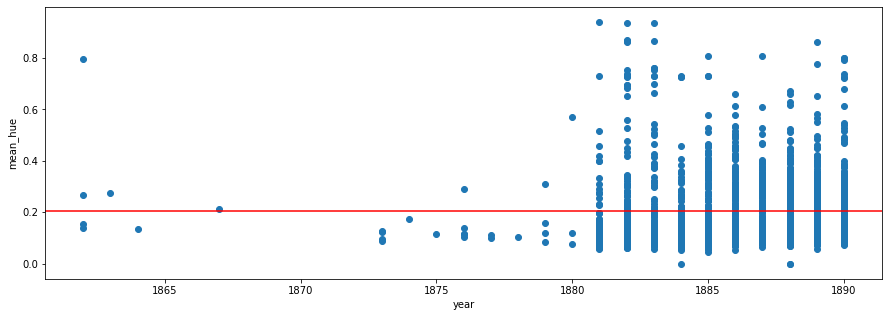

In [197]:
#graph between year and mean hue
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
plt.scatter(info['year'], info['mean_hue']) 
plt.axhline(y=np.mean(info['mean_hue']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('mean_hue')

Text(0, 0.5, 'mean_saturation')

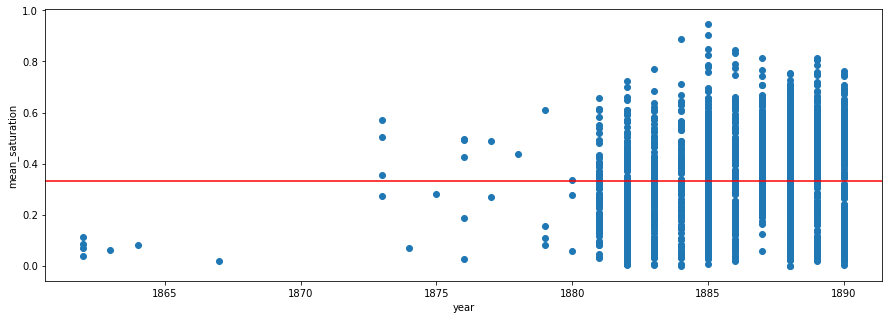

In [198]:
#graph between year and mean saturation
plt.figure(figsize=(15, 5))
plt.scatter(info['year'], info['mean_saturation']) 
plt.axhline(y=np.mean(info['mean_saturation']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('mean_saturation')

Text(0, 0.5, 'mean_brightness')

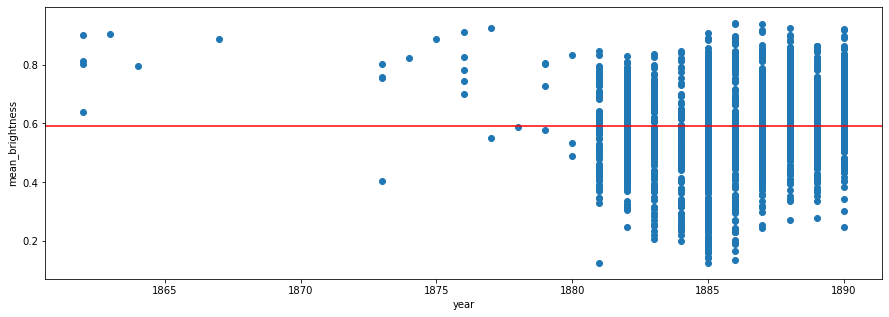

In [199]:
#graph between year and brightness
plt.figure(figsize=(15, 5))
plt.scatter(info['year'], info['mean_brightness']) 
plt.axhline(y=np.mean(info['mean_brightness']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('mean_brightness')

Text(0, 0.5, 'edge')

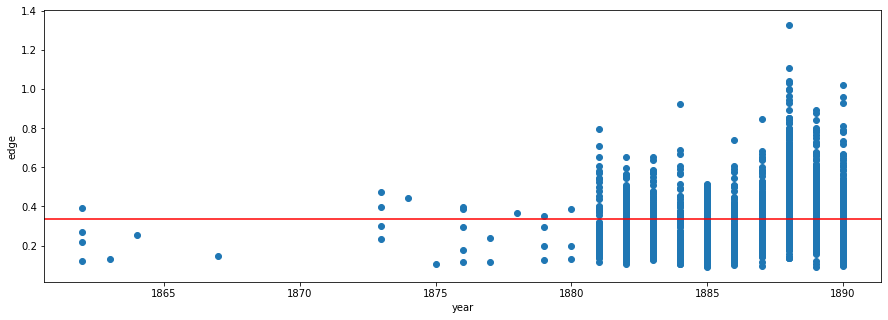

In [201]:
#graph between year and edge
plt.figure(figsize=(15, 5)) 
plt.scatter(info['year'], info['edge'])
plt.axhline(y=np.mean(info['edge']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('edge')

Text(0, 0.5, 'energy')

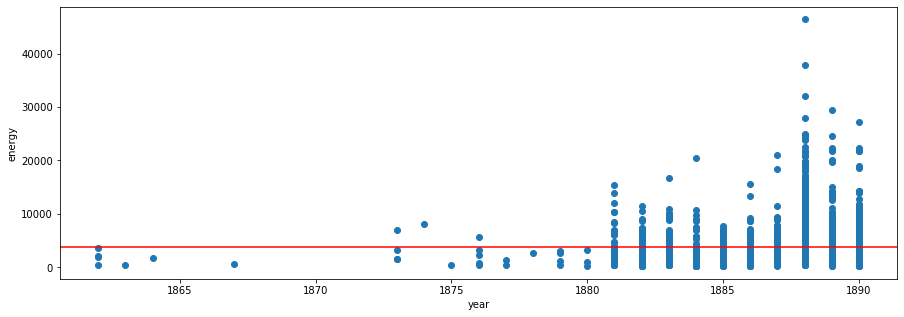

In [202]:
#graph between year and energy
plt.figure(figsize=(15, 5)) 
plt.scatter(info['year'], info['energy'])
plt.axhline(y=np.mean(info['energy']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('energy')

Text(0, 0.5, 'resolution')

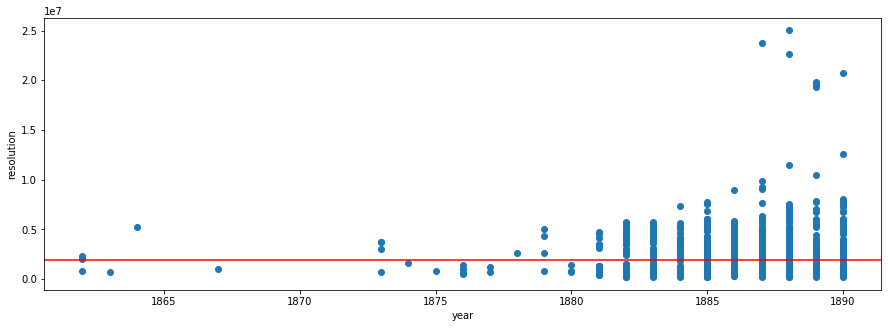

In [203]:
#graph between year and resolution
plt.figure(figsize=(15, 5))
plt.scatter(info['year'], info['resolution']) 
plt.axhline(y=np.mean(info['resolution']), color='r', linestyle='-') 
plt.xlabel('year')
plt.ylabel('resolution')

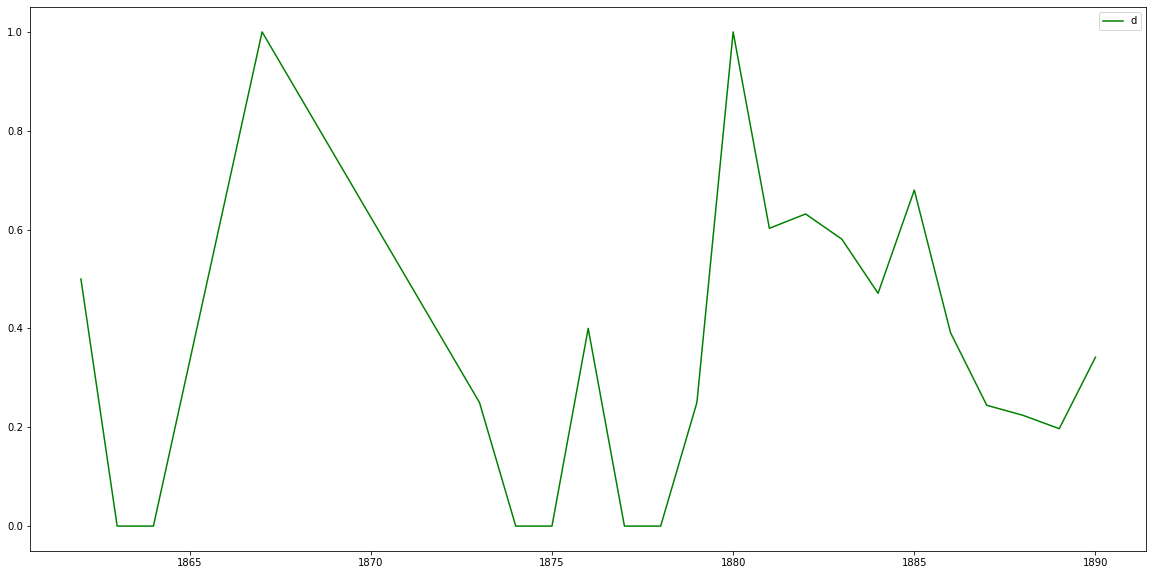

In [204]:
#line chart about people proportion for different years
face_detect = pd.DataFrame(info.groupby('year').sum()['person']/info.groupby('year').count()['person'])
plt.figure(figsize=(20, 10))
plt.plot(np.array(face_detect.index), face_detect['person'], color='g',label='hue')
plt.gca().legend(('draw people'))
plt.show()

In [207]:
result = info.groupby('year').mean()
result.head()

,image_width,image_height,mean_hue,mean_saturation,mean_brightness,person,edge,energy,resolution
year,,,,,,,,,
1862,1709.75,1096.5,0.339615,0.075967,0.787875,0.50,0.251831,2014.009990,1812769.75
1863,719.00,1024.0,0.273486,0.060764,0.903436,0.00,0.132495,412.773804,736256.00
1864,2681.00,1974.0,0.134765,0.079547,0.795650,0.00,0.252165,1662.973463,5292294.00
1867,1012.00,1024.0,0.213281,0.018696,0.885655,1.00,0.148610,713.404519,1036288.00
1873,1641.25,1624.0,0.108650,0.425306,0.679436,0.25,0.350246,3353.995148,2823433.75


In [208]:
import matplotlib.pyplot as plt
x = np.array(result.index)
y1 = np.array(result['mean_hue'])
y2 = np.array(result['mean_saturation'])
y3 = np.array(result['mean_brightness'])
y4 = np.array(result['person'])
y5 = np.array(result['edge'])
y6 = np.array(result['energy'])

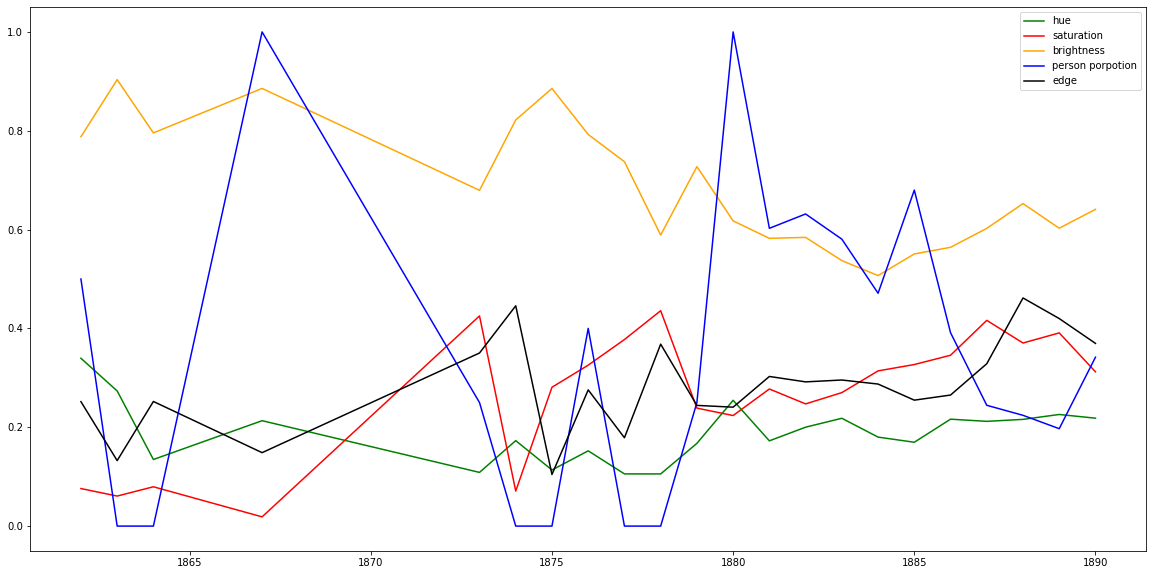

In [211]:
#many information in a same graph with different year 
plt.figure(figsize=(20, 10))
plt.plot(x, y1, color='g',label='hue')
plt.plot(x, y2, color='r',label='saturation')
plt.plot(x, y3, color='orange',label='brightness')
plt.plot(x, y4, color='blue',label='person porpotion')
plt.plot(x, y5, color='black',label='edge')
# plt.plot(x, y6, color='pink',label='energy')
plt.gca().legend(('hue','saturation','brightness','person porpotion', 'edge','energy'))
plt.show()

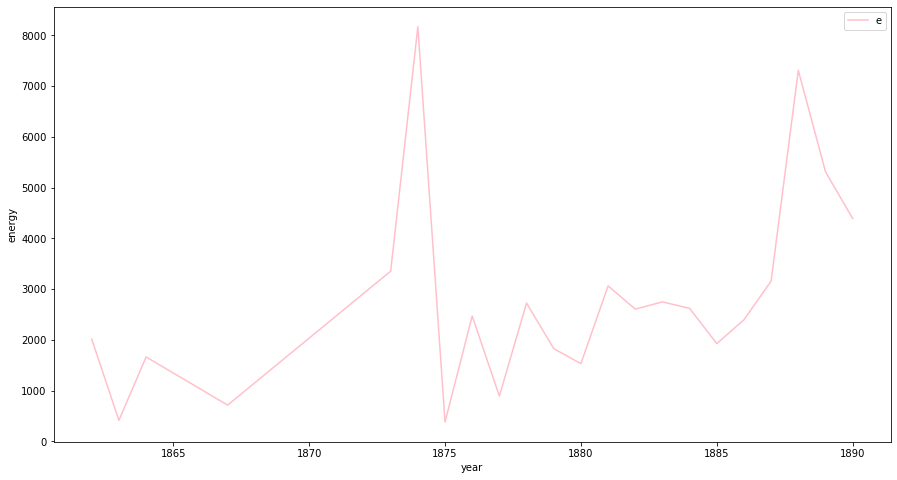

In [212]:
#graph show energy in different year
plt.figure(figsize=(15, 8))
plt.plot(x, y6, color='pink',label='energy')
plt.gca().legend(('energy'))
plt.xlabel('year')
plt.ylabel('energy')
plt.show()

# bitmap part

### different year v.s. person proportion for each year

In [468]:

artwork = ['the-goat-herd-1862.jpg', 'corinthian-capital-1863(1).jpg','barn-and-farmhouse(1).jpg',
          'two-sketches-of-a-man-leaning-on-his-spade-1867.jpg','old-woman-asleep-after-rops-1873.jpg',
          'austin-friars-church-london(1).jpg','town-d-avray-l-etang-au-batelier-1875.jpg',
          'view-of-royal-road-ramsgate-1876.jpg','the-cave-of-machpelah-1877.jpg',
          'au-charbonnage-café-1878(1).jpg','coal-shoveler-1879(1).jpg','miners-1880.jpg',
           'a-digger-1881(1).jpg','beach-with-people-walking-and-boats-1882(1).jpg',
           'bulb-fields-1883(1).jpg',
           'alley-bordered-by-trees-1884(1).jpg','cottage-and-woman-with-goat-1885(1).jpg',
           'belvedere-overlooking-montmartre-1886(1).jpg',
           'absinthe-1887(1).jpg',
           'starry-night-over-the-rhone.jpg','self-portrait-1889-1.jpg',
           'portrait-of-doctor-gachet-1890.jpg']
result = pd.DataFrame()
for i in artwork:
    result = result.append(thubnail_dataf[thubnail_dataf['name']==i], ignore_index=True)
result.head()

,name,width,height,mean_hue,mean_saturation,mean_brightness,year
0,the-goat-herd-1862.jpg,1024.0,775.0,0.796594,0.037634,0.810272,1862
1,corinthian-capital-1863(1).jpg,719.0,1024.0,0.273486,0.060764,0.903436,1863
2,barn-and-farmhouse(1).jpg,2681.0,1974.0,0.134765,0.079547,0.795650,1864
3,two-sketches-of-a-man-leaning-on-his-spade-186...,1012.0,1024.0,0.213281,0.018696,0.885655,1867
4,old-woman-asleep-after-rops-1873.jpg,1650.0,2259.0,0.087127,0.570844,0.403860,1873


In [476]:
list_name_artwork = []
for i in result['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork.append(i)



In [483]:
#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1000), bg_color)

In [484]:
# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2

In [485]:
double_mean = result[['year']]

coords = [(int(year_transform[i]), int((list(y4)[i])*600)) \
          for i in range(double_mean.shape[0])]

In [486]:
# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork[i])
        figure.paste(thumb_img, coords[i])

In [487]:
figure.save("year_person_proportion.jpg")

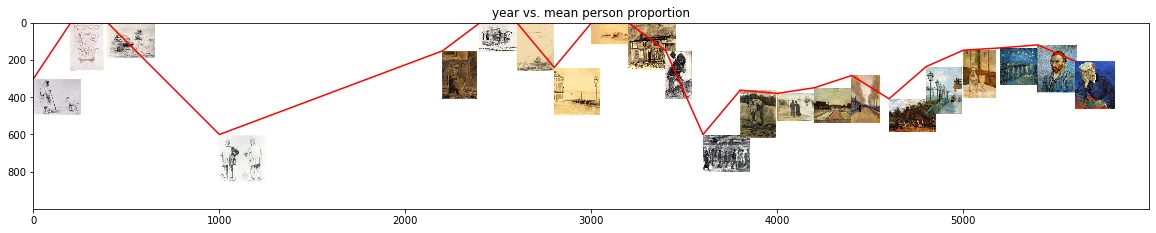

In [488]:
image = plt.imread("year_person_proportion.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean person proportion")
ax.plot(year_transform, (y4*600), color='r',label='person_proportion')

# differernt year v.s. mean_hue

In [506]:
artwork1 = ['the-goat-herd-1862.jpg', 'corinthian-capital-1863(1).jpg','barn-and-farmhouse(1).jpg',
          'two-sketches-of-a-man-leaning-on-his-spade-1867.jpg','old-woman-asleep-after-rops-1873.jpg',
          'austin-friars-church-london(1).jpg','town-d-avray-l-etang-au-batelier-1875.jpg',
          'view-of-royal-road-ramsgate-1876.jpg','the-cave-of-machpelah-1877.jpg',
          'au-charbonnage-café-1878(1).jpg','coal-shoveler-1879(1).jpg','miners-1880.jpg',
           'a-marsh-1881(1).jpg','beach-at-scheveningen-in-calm-weather-1882(1).jpg',
           'bulb-fields-1883(1).jpg',
           'alley-bordered-by-trees-1884(1).jpg','cottage-and-woman-with-goat-1885(1).jpg',
           'basket-of-carnations-and-zinnias-1886(1).jpg',
           'absinthe-1887(1).jpg',
           'starry-night-over-the-rhone.jpg','self-portrait-1889-1.jpg',
           'portrait-of-doctor-gachet-1890.jpg']
result2 = pd.DataFrame()
for i in artwork1:
    result2 = result2.append(thubnail_dataf[thubnail_dataf['name']==i], ignore_index=True)
result2

,name,width,height,mean_hue,mean_saturation,mean_brightness,year
0,the-goat-herd-1862.jpg,1024.0,775.0,0.796594,0.037634,0.810272,1862
1,corinthian-capital-1863(1).jpg,719.0,1024.0,0.273486,0.060764,0.903436,1863
2,barn-and-farmhouse(1).jpg,2681.0,1974.0,0.134765,0.079547,0.795650,1864
3,two-sketches-of-a-man-leaning-on-his-spade-186...,1012.0,1024.0,0.213281,0.018696,0.885655,1867
4,old-woman-asleep-after-rops-1873.jpg,1650.0,2259.0,0.087127,0.570844,0.403860,1873
5,austin-friars-church-london(1).jpg,1641.0,999.0,0.172909,0.070859,0.821816,1874
6,town-d-avray-l-etang-au-batelier-1875.jpg,801.0,1024.0,0.113541,0.280920,0.885591,1875
7,view-of-royal-road-ramsgate-1876.jpg,990.0,1024.0,0.113921,0.426261,0.909921,1876
8,the-cave-of-machpelah-1877.jpg,1627.0,734.0,0.098800,0.486841,0.923576,1877
9,au-charbonnage-café-1878(1).jpg,1640.0,1615.0,0.105540,0.435818,0.588960,1878


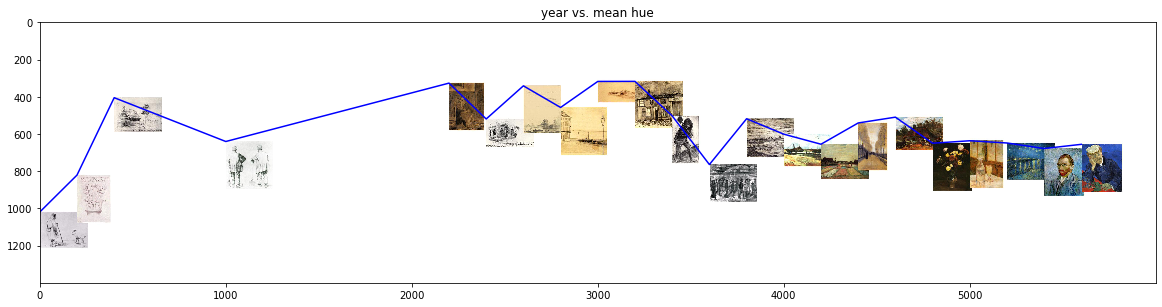

In [492]:
list_name_artwork2 = []
for i in result2['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork2.append(i)
    

#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1400), bg_color)

# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2

double_mean = result2[['year']]
coords = [(int(year_transform[i]), int((list(y1)[i])*3000)) \
          for i in range(double_mean.shape[0])]

# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork2[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork2[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork2[i])
        figure.paste(thumb_img, coords[i])
        
figure.save("year_mean_hue.jpg")

image = plt.imread("year_mean_hue.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean hue")
ax.plot(year_transform, y1*3000, color='b',label='hue')

## different year v.s. mean saturation

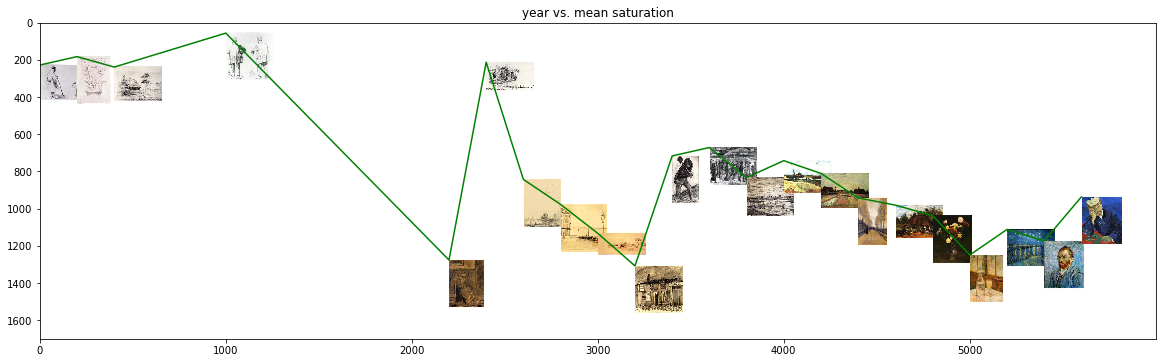

In [494]:
list_name_artwork2 = []
for i in result2['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork2.append(i)
    

#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1700), bg_color)

# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2


double_mean = result2[['year']]
coords = [(int(year_transform[i]), int((list(y2)[i])*3000)) \
          for i in range(double_mean.shape[0])]

# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork2[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork2[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork2[i])
        figure.paste(thumb_img, coords[i])
        
figure.save("year_mean_saturation.jpg")

image = plt.imread("year_mean_saturation.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean saturation")
ax.plot(year_transform, y2*3000, color='g',label='saturation')

## different year v.s. mean brightness

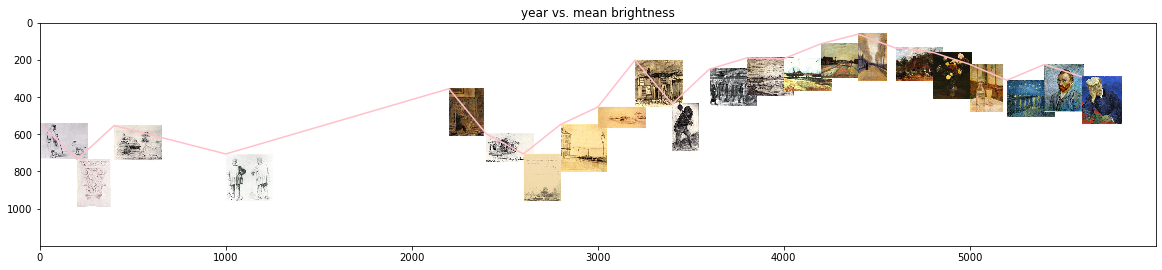

In [498]:
list_name_artwork2 = []
for i in result2['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork2.append(i)
    

#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1200), bg_color)

# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2

double_mean = result2[['year']]
coords = [(int(year_transform[i]), int(((list(y3)[i])*1700)-800)) \
          for i in range(double_mean.shape[0])]

# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork2[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork2[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork2[i])
        figure.paste(thumb_img, coords[i])
        
figure.save("year_mean_brightnesss.jpg")

image = plt.imread("year_mean_brightnesss.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean brightness")
ax.plot(year_transform, ((y3*1700)-800), color='pink',label='brightness')

## different year v.s. mean edges

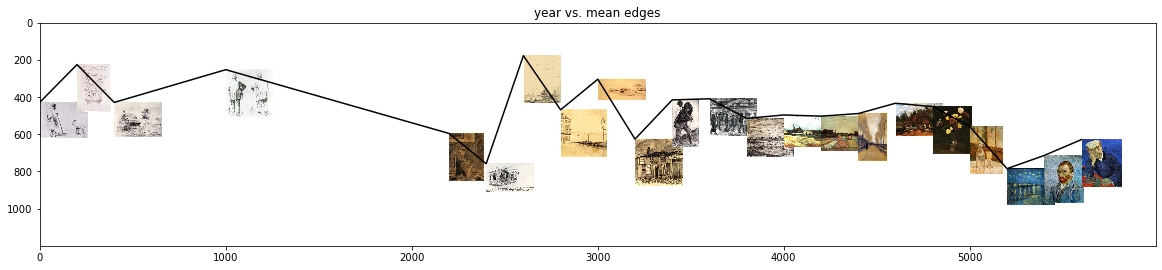

In [501]:
list_name_artwork2 = []
for i in result2['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork2.append(i)
    

#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1200), bg_color)

# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2

double_mean = result2[['year']]
coords = [(int(year_transform[i]), int(((list(y5)[i])*1700))) \
          for i in range(double_mean.shape[0])]

# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork2[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork2[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork2[i])
        figure.paste(thumb_img, coords[i])
        
figure.save("year_mean_edges.jpg")

image = plt.imread("year_mean_edges.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean edges")
ax.plot(year_transform, ((y5*1700)), color='black',label='edges')

## different year v.s. energy

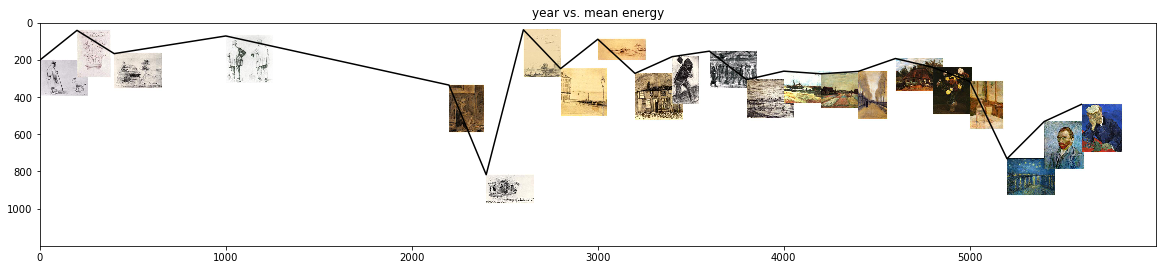

In [512]:
list_name_artwork2 = []
for i in result2['name']:
    if ".Jpg" in i:
        i.replace(".Jpg", ".jpg")
    list_name_artwork2.append(i)
    

#plot total bitmap for the whole
GLOBAL_WIDTH = 5000
bg_color = (255, 255, 255) # gray, you can choose your own
figure = Image.new('RGB', (6000, 1200), bg_color)

# we will transform the year to more apparent number that can let the picture clearly show in bitmap
a =[0, 100, 200, 500, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
    1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800]
year_transform = np.array(a)*2

double_mean = result2[['year']]
coords = [(int(year_transform[i]), int(((list(y6)[i])/10))) \
          for i in range(double_mean.shape[0])]

# iterate over images/coords and draw to image
thumbnail_path = 'dsc160_project_thumbnail/'
for i in range(len(coords)):
    if list_name_artwork2[i] == 'vincent-van-gogh-three-sunflowers-in-a-vase.jpg':
        variablex = 'vincent-van-gogh-three-sunflowers-in-a-vase.Jpg'
        thumb_img = Image.open(thumbnail_path+variablex)
        figure.paste(thumb_img, coords[i])
    elif list_name_artwork2[i] == 'adeline-ravoux.jpg':
        variabley = 'adeline-ravoux.JPG'
        thumb_img = Image.open(thumbnail_path+variabley)
        figure.paste(thumb_img, coords[i])
    else:
        thumb_img = Image.open(thumbnail_path+list_name_artwork2[i])
        figure.paste(thumb_img, coords[i])
        
figure.save("year_mean_energy.jpg")

image = plt.imread("year_mean_energy.jpg")

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('on')  # clear x-axis and y-axis
ax.set_title("year vs. mean energy")
ax.plot(year_transform, ((y6)/10), color='black',label='energy')